# Database Administrator Guide

## Table of Contents:
* [Schema and ERD](#schema)
* [Database Table and Properties](#db)
* [Python API Functions](#python)

Below is a guide to the initial database schema and table set up, designed to be of assistance to an administrator who may need to learn or edit the database.There are six tables: instrument, detector, pixel, darks, anneal_period and has_properties_in.

The first five tables establish entities and attributes related to them. The last and largest one, has_properties_in, establishes a relationship between anneal_period and pixel and produces they important attributes, stability and darkrate of each pixel over each anneal_period. Because there are so many pixels, the table will grow quite large, with each annealing period adding 1.05 million more records. At creation of the database, there are 200 annealing periods, producing just shy of 210 million records in the has_properties_in table. The expectation that this number will only grow in size was a key factor in the design of this database. The intent, was to build out the other pieces of the database in a streamlined manner. 

In [11]:
import os
import mysql.connector
import pandas as pd
import numpy as np

## Schema and ERD <a class="anchor" id="schema"></a>

Here are the initial database schema and ERD.

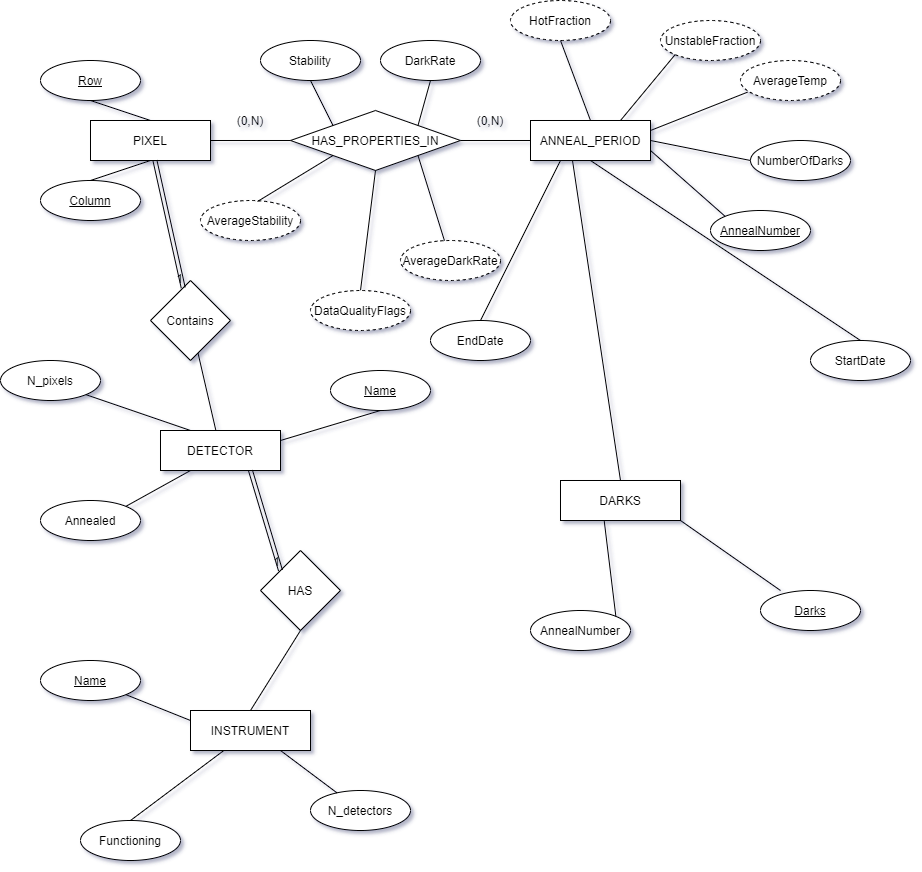

In [1]:
from PIL import Image
ERD = Image.open("pixeldb_ERD.png")
ERD

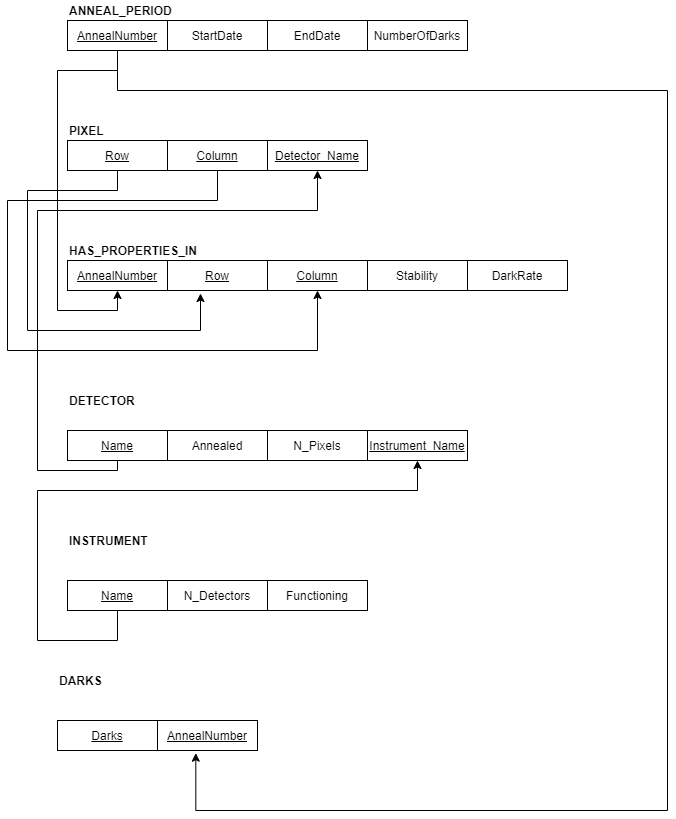

In [2]:
from PIL import Image
schema = Image.open("pixeldb_schema.png")
schema

## Database Tables and Properties <a class="anchor" id="db"></a>

This section provides detailed info on the database tables, including fields, datatypes and primary keys.

In [4]:
connection = mysql.connector.connect(host = 'localhost',
                                    user = 'your_username',
                                    password = 'your_password',
                                    db = 'anneals_pixels',
                                    auth_plugin='mysql_native_password')

In [5]:
connection

In [6]:
pixel_tables = pd.read_sql_query('show tables from anneals_pixels', connection)

In [7]:
pixel_tables

,Tables_in_anneals_pixels
0,anneal_period
1,darks
2,detector
3,has_properties_in
4,instrument
5,pixel


In [8]:
tables = pixel_tables['Tables_in_anneals_pixels']

In [10]:
for table_name in tables:
    output = pd.read_sql_query('Describe {}'.format(table_name), connection)
    print(table_name)
    print(output, '\n')

anneal_period
           Field     Type Null  Key Default Extra
0   AnnealNumber   b'int'   NO  PRI    None      
1      StartDate  b'date'  YES         None      
2        EndDate  b'date'  YES         None      
3  NumberOfDarks   b'int'  YES         None       

darks
          Field            Type Null  Key Default Extra
0         Darks  b'varchar(10)'   NO  PRI    None      
1  AnnealNumber          b'int'  YES  MUL    None       

detector
       Field            Type Null  Key Default Extra
0      DName   b'varchar(8)'   NO  PRI    None      
1   Annealed   b'tinyint(1)'  YES         None      
2     N_Rows          b'int'  YES         None      
3  N_Columns          b'int'  YES         None      
4      IName  b'varchar(10)'  YES  MUL    None       

has_properties_in
          Field             Type Null  Key Default Extra
0  AnnealNumber           b'int'   NO  PRI    None      
1        RowNum           b'int'   NO  PRI    None      
2     ColumnNum           b'int'   NO  P

## Python API Functions <a class="anchor" id="python"></a>

* [pixeldb.PixelDB.custom_query](#custom_query)
* [pixeldb.PixelDB.query_pixel](#query_pixel)
* [pixeldb.PixelDB.query_pixel_region](#query_pixel_region)
* [pixeldb.PixelDB.query_anneal](#query_anneal)
* [pixeldb.PixelDB.query_anneal_darks](#query_anneal_darks)
* [pixeldb.PixelDB.load_pixel_mapping](#load_pixel_mapping)
* [pixeldb.PixelDB.check_for_anneals](#check_for_anneals)
* [pixeldb.PixelDB.insert_anneal](#insert_anneal)

In [1]:
from stispixeldb import pixeldb

In [2]:
#Create a connection object
pixdb = pixeldb.PixelDB(host="localhost",user='your_username',password='your_password',database='anneals_pixels')

### pixeldb.PixelDB.custom_query <a class="anchor" id="custom_query"></a>

In [7]:
print(pixdb.custom_query.__doc__)

Execute a general mysql query against the database. Maintains a list of prohibited commands to execute.
        
        Args: 
            statement (str): The SQL string to execute against the database
        Returns:
            pandas.DataFrame: a dataframe of the results, may be empty if the query produces no output
        


### pixeldb.PixelDB.query_pixel <a class="anchor" id="query_pixel"></a>

In [6]:
print(pixdb.query_pixel.__doc__)

Return pixel properties for a given pixel and anneal combination. Must specify one of date or anneal_number, if date is specified, will determine the correct anneal_number, if date and anneal_num are specified, the date will be ignored.
        
        Args:
            pixel_row (int): The row index of the pixel to retreive
            pixel_col (int): The column index of the pixel to retreive
            date (:obj:,`str`, optional): Defaults to None, the date string in format YYYY-MM-DD or YYYY-MM-DD HH:MM:SS
            anneal_num (:obj:,`int`, optional): Defaults to None, the anneal number to query on
            columns (:obj:,`list`, optional): Defaults to the full set of columns, can specify a limited subset to return just those columns

        Returns:
            pandas.DataFrame: a dataframe of the results, may be empty if the query produces no output
        


### pixeldb.PixelDB.query_pixel_region <a class="anchor" id="query_pixel_region"></a>

In [5]:
print(pixdb.query_pixel_region.__doc__)

Return pixel properties for a given pixel and anneal combination.Must specify one of date or anneal_number, if date is specified, will determine the correct anneal_number, if date and anneal_num are specified, the date will be ignored.
        
        Args:
            pixel_row_range (list or tuple): A tuple or list of the min and max values of the row range to query
            pixel_col (list or tuple): A tuple or list of the min and max values of the column range to query
            date (:obj:,`str`, optional): Defaults to None, the date string in format YYYY-MM-DD or YYYY-MM-DD HH:MM:SS
            anneal_num (:obj:,`int`, optional): Defaults to None, the anneal number to query on
            columns (:obj:,`list`, optional): Defaults to the full set of columns, can specify a limited subset to return just those columns

        Returns:
            pandas.DataFrame: a dataframe of the results, may be empty if the query produces no output
        


### pixeldb.PixelDB.query_anneal <a class="anchor" id="query_anneal"></a>

In [8]:
print(pixdb.query_anneal.__doc__)

Return anneal properties for a single anneal. Must specify one of date or anneal_number, if date is specified, will determine the correct anneal_number, if date and anneal_num are specified, the date will be ignored.
        
        Args:
            date (:obj:,`str`, optional): Defaults to None, the date string in format YYYY-MM-DD or YYYY-MM-DD HH:MM:SS
            anneal_num (:obj:,`int`, optional): Defaults to None, the anneal number to query on
            instrument (:obj:,`str`, optional): Defaults to 'STIS', the instrument to query on
            detector (:obj:,`str`, optional): Defaults to 'CCD', the instrument to query on
            columns (:obj:,`list`, optional): Defaults to the full set of columns, can specify a limited subset to return just those columns
        Returns:
            pandas.DataFrame: a dataframe of the results, may be empty if the query produces no output
        


### pixeldb.PixelDB.query_anneal_darks <a class="anchor" id="query_anneal_darks"></a>

In [9]:
print(pixdb.query_anneal_darks.__doc__)

Return the list of dark names for a given anneal. Must specify one of date or anneal_number, if date is specified, will determine the correct anneal_number, if date and anneal_num are specified, the date will be ignored.
        
        Args:
            date (:obj:,`str`, optional): Defaults to None, the date string in format YYYY-MM-DD or YYYY-MM-DD HH:MM:SS
            anneal_num (:obj:,`int`, optional): Defaults to None, the anneal number to query on
            instrument (:obj:,`str`, optional): Defaults to 'STIS', the instrument to query on
            detector (:obj:,`str`, optional): Defaults to 'CCD', the instrument to query on
            columns (:obj:,`list`, optional): Defaults to the full set of columns, can specify a limited subset to return just those columns
        Returns:
            pandas.DataFrame: a dataframe of the results, may be empty if the query produces no output
        


### pixeldb.PixelDB.load_pixel_mapping <a class="anchor" id="load_pixel_mapping"></a>

In [10]:
print(pixdb.load_pixel_mapping.__doc__)

Load the mapping of pixel entities into the database based on a mapping csv file.For the STIS CCD, this file is generated by the `create_pix_csv.py` script.

        Args:
            csv_loc (:obj:,`str`, optional): Defaults to '.' (current directory), the location of the mapping csv file
            csv_name (:obj:,`str`, optional): Defaults to 'pixel_map.csv', the name of the csv file
        Returns:
            None
        


### pixeldb.PixelDB.check_for_anneals <a class="anchor" id="check_for_anneals"></a>

In [11]:
print(pixdb.check_for_anneals.__doc__)

Checks the anneals stored in the database against the list of available anneals.
        
        Args:
            exclude (:obj:,`list`, optional): Defaults to an empty list. A list of anneal numbers to ignore for comparison, useful as we don't consider the first ~28 anneals for analysis.

        Returns:
            list: Returns a list of anneals not contained in the pixel database
        


### pixeldb.PixelDB.insert_anneal <a class="anchor" id="insert_anneal"></a>

In [12]:
print(pixdb.insert_anneal.__doc__)

Loads an anneal and it's corresponding pixel properties and darks into the database. Loads pixel properties based on an accompanying anneal_{anneal_num}.csv file.
        
        Args:
            anneal_num (int): The number of the anneal to populate, determines the filename to search for as anneal_{anneal_num}.csv
            csv_loc (:obj:,'str', optional): Defaults to '.' (current directory), the location of the pixel property csv file

        Returns
            None
        
